By Meetra Nouri

# Project statement:
The Company A would like to understand the global trends (direction) in investments to make investments in a few companies.
Company A wants to invest 1 to 6 million dollar per round of investment

- It wants to invest only in China plus countries that have English as one of the official languages in that country.

## Business goal:

Company A wants to invest where most other investors are investing
So the goal is to identify the best countries, sectors, and a right investment where others are investing.

The goals are divided into three sub-goals:

Investment type analysis:

Comparing the typical investment amounts
in the venture, seed, angel, private equity etc. so that company A can
choose the type that is best suited for their strategy.

Country analysis:

Identifying the countries which have been the most invested in the past. These will be company A favorites as well.

Sector analysis:

Understanding the distribution of investments across
the eight main sectors provided in the mapping file. 
The two files — companies and
rounds2 — have numerous sub-sector names; hence, we will need to
map each sub-sector to its main sector.

Data is real investment data which is taken from crunchbase.com. We have to use three main data tables for the entire analysis


#  Part 1: Data Cleaning
reading data files and
using encoding = "ISO-8859-1" to avoid pandas encoding error

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


rounds = pd.read_csv("rounds.csv", encoding = "ISO-8859-1")
company = pd.read_csv("company.txt", sep="\t", encoding = "ISO-8859-1")


In [ ]:
rounds.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [ ]:
company.tail(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


"permalinks and "name" have weird non-English characters. This is likely because of encoding.

list of various encoding types python can handle: https://docs.python.org/2/library/codecs.html#standard-encodings.

In [ ]:
# let's convert all the entries to uppercase for uniformity.
company['permalink'] = company['permalink'].str.upper()
rounds['company_permalink'] = rounds['company_permalink'].str.upper()

In [ ]:
# companies present in rounds file but not in (~) companies file
rounds.loc[~rounds['company_permalink'].isin(company['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/ORGANIZATION/HUIZUCHE-COM-Æ Ç§ŸÈ½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [ ]:
rounds['company_permalink'] = rounds['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.tail(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/ORGANIZATION/ERON,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/ORGANIZATION/NOVATIFF-REKLAM-VE-TANTM-HIZMETL...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [ ]:
company['permalink'] = company['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
company['name'] = company['name'].str.encode('utf-8').str.decode('ascii', 'ignore')

company.tail(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/ORGANIZATION/ERON,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/ORGANIZATION/ASYS-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/ORGANIZATION/NOVATIFF-REKLAM-VE-TANTM-HIZMETL...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking the number of unique values in company dataframe.
print(len(company['permalink'].unique()))
len(rounds['company_permalink'].unique())

66368


66368

In [ ]:
rounds['company_permalink'] = rounds['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [ ]:
company['permalink'] = company['permalink'].str.upper()
rounds['company_permalink'] = rounds['company_permalink'].str.upper()

In [ ]:
#checking the number of unique values in company dataframe.
print(len(company['permalink'].unique()))
len(rounds['company_permalink'].unique())

66368


66368

there are 66368 unique companies in both the rounds and companies dataframes.

In [ ]:
company.info(), "\n"
company.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


(66368, 10)

In [ ]:
# percentage of the missing values (column-wise)
c=company.isnull().sum()/len(company.index)
round(100*c, 1).sort_values(ascending=False)

founded_at       22.9
state_code       12.9
city             12.1
region           12.1
country_code     10.5
homepage_url      7.6
category_list     4.7
status            0.0
name              0.0
permalink         0.0
dtype: float64

For the business objectives given, the columns founded_at, state_code, region, city and homepage_url need not be used. so, let's drop them

In [ ]:
# dropping columns 

company = company.drop(['founded_at', 'state_code', 'city', 'region', 'homepage_url'], axis=1)
company.head()

,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,Software,operating,USA


In [ ]:
rounds.info(), "\n"
rounds.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


(114949, 6)

In [ ]:
# percentage of the missing values (column-wise)
c=rounds.isnull().sum()/len(rounds.index)
round(100*c, 1).sort_values(ascending=False)

funding_round_code         72.9
raised_amount_usd          17.4
funded_at                   0.0
funding_round_type          0.0
funding_round_permalink     0.0
company_permalink           0.0
dtype: float64

"funding_round_code" with 73% of missing data is useless. So, let's it.

In [ ]:
rounds = rounds.drop(['funding_round_code'], axis=1)
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


funding_round_code and raised_amount_usd contain missing values.
permalink feature in company and company_permalink feature in rounds are same.


 Let's write these dataframes into separate files so we don't have to worry about encoding problems again.

In [ ]:
rounds.to_csv("rounds_new.csv", sep=',', index=False)

company.to_csv("company_new.csv", sep='\t', index=False)

# Missing Value

In [ ]:
# read the new, decoded csv files
rounds = pd.read_csv("rounds_new.csv", encoding = "ISO-8859-1")
company = pd.read_csv("company_new.csv", sep="\t", encoding = "ISO-8859-1")

In [ ]:
# missing values in rounds
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [ ]:
# missing values in company
company.isnull().sum()

permalink           0
name                1
category_list    3148
status              0
country_code     6958
dtype: int64

It's better to merge the two dataframe and then treat missing values.
Note that there are no misisng values in the permalink or company_permalink, and these two features represent same information. after merging we remove one of them.

In [ ]:
df = pd.merge(company, rounds, how="inner", left_on="permalink", right_on="company_permalink")
company_rounds=df.drop(['company_permalink'], axis=1).copy()
company_rounds.tail(2)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
114947,/ORGANIZATION/ASYS-2,asys,Consumer Electronics|Internet of Things|Teleco...,operating,USA,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,18192.0
114948,/ORGANIZATION/NOVATIFF-REKLAM-VE-TANTM-HIZMETL...,novatiff Reklam ve Tantm Hizmetleri Tic,Consumer Goods|E-Commerce|Internet,operating,NaN,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,01-10-2013,14851.0


In [ ]:
company_rounds.shape

(114949, 9)

In [ ]:
company_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   category_list            111539 non-null  object 
 3   status                   114949 non-null  object 
 4   country_code             106271 non-null  object 
 5   funding_round_permalink  114949 non-null  object 
 6   funding_round_type       114949 non-null  object 
 7   funded_at                114949 non-null  object 
 8   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(8)
memory usage: 8.8+ MB


In [ ]:
# fraction of missing values in each column.
p=company_rounds.isnull().sum()/company_rounds.shape[0]
round(100*p,1).sort_values(ascending=False)

raised_amount_usd          17.4
country_code                7.5
category_list               3.0
funded_at                   0.0
funding_round_type          0.0
funding_round_permalink     0.0
status                      0.0
name                        0.0
permalink                   0.0
dtype: float64

columns "funding_round_code" , "country_code" and "category_list" have missing data.

the column "raised_amount_usd" is the number we want to analyse (compare, means, etc), 
so it is an is an important column. so, it's better to remove NaNs in "raised_amount_usd".

we're going to use "country_code" for country-wise analysis.

and we're going to use "category_list" to merge the dataframes with the main categories.

In [ ]:
company_rounds.dropna(axis=0, subset=['raised_amount_usd'], inplace=True)

In [ ]:
company_rounds['category_list']

0                                                     Media
2         Application Platforms|Real Time|Social Network...
3                                         Apps|Games|Mobile
4                                               Curated Web
6                                                     Games
                                ...                        
114943          Advertising|Mobile|Web Development|Wireless
114944          Advertising|Mobile|Web Development|Wireless
114945          Advertising|Mobile|Web Development|Wireless
114947    Consumer Electronics|Internet of Things|Teleco...
114948                   Consumer Goods|E-Commerce|Internet
Name: category_list, Length: 94959, dtype: object

In [ ]:
company_rounds.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [ ]:
company_rounds[pd.isnull(company_rounds['country_code'])][:3]


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
32,/ORGANIZATION/1000CHI,Beijing 1000CHI Software Technology,Mobile,operating,NaN,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,01-04-2010,43923865.0
66,/ORGANIZATION/10K-2,Beans Around,Coffee|Delivery|Subscription Service,operating,NaN,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,04-09-2015,100000.0


In [ ]:
company_rounds.fillna(999, inplace=True)

In [ ]:
# fraction of missing values in each column.
p=company_rounds.isnull().sum()/company_rounds.shape[0]
round(100*p,1).sort_values(ascending=False)

raised_amount_usd          0.0
funded_at                  0.0
funding_round_type         0.0
funding_round_permalink    0.0
country_code               0.0
status                     0.0
category_list              0.0
name                       0.0
permalink                  0.0
dtype: float64

In [ ]:
# writing the dataframe to an another file
company_rounds.to_csv("company_rounds1.csv", sep=',', index=False)

# Part 3: Analysis


We're going over three types of analyses:

3.1 : funding type

3.2: country analysis

3.3: sector analysis


## 3.1 Funding Type Analysis

We're going to compare the funding amounts across the funding types.

we need to impose the constraint that the investment amount should be between 8 and 18 million USD. 

We will choose the funding type such that the average investment amount falls in this range.

In [ ]:
df = pd.read_csv("company_rounds1.csv", sep=",")
df.head(2)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0


In [ ]:
df['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

We filter  df so it only contains the 4 specified funding types.


In [ ]:
df = df[(df['funding_round_type'] == "venture") | 
        (df['funding_round_type'] == "seed") | 
        (df['funding_round_type'] == "private_equity") | 
        (df['funding_round_type'] == "angel") ]

Let's compare summary stats across 4 categories:


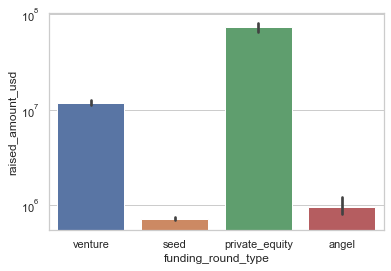

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x="funding_round_type", y="raised_amount_usd", data=df)
plt.yscale('log')
plt.show()

Let's compare the mean and median values across categories:


In [ ]:
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   400000.0     20000000.0  275000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   958694.469753   7.330859e+07  719817.996907  1.174895e+07

There's a significant difference between the mean and the median values for all 4 types.

We'll choose median to be representative value of the funding amount for each type of invesstment.


In [ ]:
# compare the mean investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.330859e+07
venture           1.174895e+07
angel             9.586945e+05
seed              7.198180e+05
Name: raised_amount_usd, dtype: float64

In [ ]:
# compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

Note that Company A wants to invest 1 to 6 million dollar per round of investment;

It seems, 'venture' type investment will be most suited to Company A.

Before proceeding further, note that the "category_list" column contains values such as "Advertising|Mobile|Web Development|Wireless" - in this, 'Advertising' is the 'main category' of the company, which we need to use.

Let's extract the main categories in a new column.

In [ ]:
df['category_list']

0                                                    Media
1        Application Platforms|Real Time|Social Network...
2                                        Apps|Games|Mobile
3                                              Curated Web
5                                            Biotechnology
                               ...                        
94952                                  Enterprise Software
94953          Advertising|Mobile|Web Development|Wireless
94954          Advertising|Mobile|Web Development|Wireless
94956          Advertising|Mobile|Web Development|Wireless
94957    Consumer Electronics|Internet of Things|Teleco...
Name: category_list, Length: 80627, dtype: object

In [ ]:
# extracting the main category
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])
df['main_category'] = df['main_category'].str.upper()
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,MEDIA
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,APPLICATION PLATFORMS
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,999,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,APPS
3,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,CURATED WEB
5,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,BIOTECHNOLOGY


In [ ]:
# drop the category_list column
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/ORGANIZATION/-FAME,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,MEDIA
1,/ORGANIZATION/-QOUNTER,:Qounter,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,APPLICATION PLATFORMS
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",operating,999,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,APPS
3,/ORGANIZATION/0-6-COM,0-6.com,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,CURATED WEB
5,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,BIOTECHNOLOGY


## 3.2 Country Analysis

Now, we'll filter the data for only the 'venture' type investments and then compare the 'total investment' across countries.

Then , we group by "country_code" and compare the total funding amounts:

In [ ]:
# filter the df for private equity type investments
df = df[df.funding_round_type=="venture"]

In [ ]:
funding_comparison = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
funding_comparison[:10]

country_code
USA    4.225108e+11
CHN    3.983542e+10
999    2.550611e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

Note that, Company A  wants to invest only in China plus countries that have English as one of the official languages in that country.

Let's filter the dataframe so it contains only USA, CHN, GBR, IND, CAN (the top 5 countries).    

In [ ]:
# filtering for the top 5 countries
df1=df[(df['country_code']=='USA') | (df['country_code']=='CHN')
   | (df['country_code']=='GBR') | (df['country_code']=='IND')
   | (df['country_code']=='CAN')]
df1.head(2)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/ORGANIZATION/-FAME,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,MEDIA
3,/ORGANIZATION/0-6-COM,0-6.com,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,CURATED WEB


In [ ]:
df1.shape

(41838, 9)

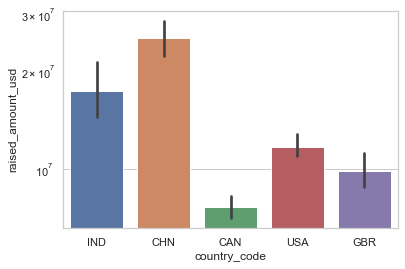

In [ ]:
## borplot to see distributions of funding amount across top 5 countries

sns.set_theme(style="whitegrid")
sns.barplot(x="country_code", y="raised_amount_usd", data=df1)
plt.yscale('log')
plt.show();

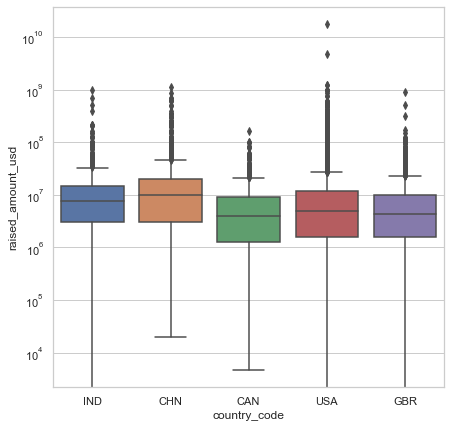

In [ ]:
## boxplot to see distributions of funding amount across top 5 countries

plt.figure(figsize=(7,7))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df1)
plt.yscale('log')
plt.show()

we have filtered the dataframe by investment type (venture) and the top 5 countries. 

Next step is to choose the sectors.


## 3.3 Sector Analysis

In this section, we'll read the map.csv file and merge the main categories with its corresponding column. 

In [ ]:
# read mapping file
map = pd.read_csv("map.csv", sep=",")
map.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [ ]:
# missing values in mapping file
map.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [ ]:
# remove the row with missing values
map.dropna(inplace=True)
map.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [ ]:
# converting common columns to Uppercase
map['category_list'] = map['category_list'].str.upper()
map.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D PRINTING,0,0,0,0,0,1,0,0,0
3,3D TECHNOLOGY,0,0,0,0,0,1,0,0,0
4,ACCOUNTING,0,0,0,0,0,0,0,0,1
5,ACTIVE LIFESTYLE,0,0,0,0,1,0,0,0,0


In [ ]:
# values in main_category column in df1 which are not in the category_list column in map file

df1[~df1['main_category'].isin(map['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
8,/ORGANIZATION/0XDATA,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,ANALYTICS
9,/ORGANIZATION/0XDATA,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,ANALYTICS
10,/ORGANIZATION/0XDATA,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,ANALYTICS
49,/ORGANIZATION/100PLUS,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,ANALYTICS
75,/ORGANIZATION/123FENG-COM,123Feng.Com,operating,CHN,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,27-10-2015,13000000.0,999
...,...,...,...,...,...,...,...,...,...
94691,/ORGANIZATION/ZOOPLA,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,PROPERTY MANAGEMENT
94714,/ORGANIZATION/ZOPA,Zopa,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,FINANCE
94715,/ORGANIZATION/ZOPA,Zopa,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,FINANCE
94716,/ORGANIZATION/ZOPA,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,FINANCE


In [ ]:
# values in the category_list column which are not in main_category column 
map[~map['category_list'].isin(df1['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,AIR POLLUTION CONTROL,0,0,1,0,0,0,0,0,0
20,ALTER0TIVE MEDICINE,0,0,0,0,1,0,0,0,0
22,A0LYTICS,0,0,0,0,0,0,0,0,1
33,AQUACULTURE,0,0,1,0,0,0,0,0,0
59,BIG DATA A0LYTICS,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,VIRTUAL WORKFORCES,0,0,0,1,0,0,0,0,0
672,WASTE MA0GEMENT,0,0,1,0,0,0,0,0,0
682,WEDDINGS,0,0,0,1,0,0,0,0,0
683,WHOLESALE,0,0,0,0,0,0,0,1,0


There are sectors named alter0tive, a0lytics, waste ma0gement, etc. this problem can be treated by replacing '0' with 'na' in the category_list column.

In [ ]:
# replacing '0' with 'na'
map['category_list'] = map['category_list'].apply(lambda x: x.replace('0', 'na'))
map[~map['category_list'].isin(df1['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,AIR POLLUTION CONTROL,0,0,1,0,0,0,0,0,0
20,ALTERnaTIVE MEDICINE,0,0,0,0,1,0,0,0,0
22,AnaLYTICS,0,0,0,0,0,0,0,0,1
33,AQUACULTURE,0,0,1,0,0,0,0,0,0
59,BIG DATA AnaLYTICS,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,VIRTUAL WORKFORCES,0,0,0,1,0,0,0,0,0
672,WASTE MAnaGEMENT,0,0,1,0,0,0,0,0,0
682,WEDDINGS,0,0,0,1,0,0,0,0,0
683,WHOLESALE,0,0,0,0,0,0,0,1,0


The problem got fixed. Now, we're going to merge "map" and "df1".

In [ ]:
# merge the dfs
df2 = pd.merge(df1, map, how='inner', left_on='main_category', right_on='category_list')
df2.head(2)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/ORGANIZATION/-FAME,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,MEDIA,MEDIA,0,0,0,1,0,0,0,0,0
1,/ORGANIZATION/90MIN,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,MEDIA,MEDIA,0,0,0,1,0,0,0,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38840 entries, 0 to 38839
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                38840 non-null  object 
 1   name                                     38840 non-null  object 
 2   status                                   38840 non-null  object 
 3   country_code                             38840 non-null  object 
 4   funding_round_permalink                  38840 non-null  object 
 5   funding_round_type                       38840 non-null  object 
 6   funded_at                                38840 non-null  object 
 7   raised_amount_usd                        38840 non-null  float64
 8   main_category                            38840 non-null  object 
 9   category_list                            38840 non-null  object 
 10  Automotive & Sports                      38840

let's drop the category_list column since it is the same as main_category.

In [ ]:
df2 = df2.drop('category_list', axis=1)
df2.head(2)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/ORGANIZATION/-FAME,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,MEDIA,0,0,0,1,0,0,0,0,0
1,/ORGANIZATION/90MIN,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,MEDIA,0,0,0,1,0,0,0,0,0


Note that the columns representing the main category is in 'wide' format. They contain the value '1' if the company belongs to that category, else 0. 

It's better to convert the df2 into the long format.

we'll store those columns that are to be melted in an array "melt_col". 

we'll use numpy.setdiff1d(ar1, ar2, assume_unique=False)
to find the set difference of two arrays.


In [ ]:
melt_col = df2.columns[9:18]

index = np.setdiff1d(df2.columns, melt_col)

print(melt_col, "\n")
index

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 



array(['country_code', 'funded_at', 'funding_round_permalink',
       'funding_round_type', 'main_category', 'name', 'permalink',
       'raised_amount_usd', 'status'], dtype=object)

Let's convert df2 into long format

pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

Unpivot a DataFrame from wide to long format.

id_vars:

tuple, list, or ndarray, optional
Column(s) to use as identifier variables.

value_vars:

tuple, list, or ndarray, optional
Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.

In [ ]:
df3 = pd.melt(df2,
              id_vars= list(index),
              value_vars= list(melt_col))

df3.head(2)

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,MEDIA,#fame,/ORGANIZATION/-FAME,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,MEDIA,90min,/ORGANIZATION/90MIN,15000000.0,operating,Automotive & Sports,0


In [ ]:
# remove rows having value=0
df3 = df3[df3['value']==1]
df3.head(2)

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
26108,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,DRONES,3D Robotics,/ORGANIZATION/3D-ROBOTICS,5000000.0,operating,Automotive & Sports,1
26109,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,DRONES,3D Robotics,/ORGANIZATION/3D-ROBOTICS,14000000.0,operating,Automotive & Sports,1


Let's drop column "value" and rename "variable" to "sector".

In [ ]:
df3 = df3.drop('value', axis=1)
df3 = df3.rename(columns={'variable': 'sector'})
print(df3.shape)
df3.head(2)

(38840, 10)


,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,sector
26108,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,DRONES,3D Robotics,/ORGANIZATION/3D-ROBOTICS,5000000.0,operating,Automotive & Sports
26109,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,DRONES,3D Robotics,/ORGANIZATION/3D-ROBOTICS,14000000.0,operating,Automotive & Sports


In [ ]:
df3.country_code.unique()

array(['USA', 'CAN', 'IND', 'GBR', 'CHN'], dtype=object)

Note that, now df3  contains only venture type investments in countries 'USA', 'CAN', 'IND', 'GBR', 'CHN', and we have mapped each company to one of the eight main sectors. 

Now, we're going to computethe amount of investment in the these countries.

Let's first filter for investment range between 1 and 6 million and then groupby country, sector and compute the count and sum.

In [ ]:
df4 = df3[(df3['raised_amount_usd'] >= 1000000) & (df3['raised_amount_usd'] <= 6000000)]
print(df3.shape)
df4.shape

(38840, 10)


(15295, 10)

In [ ]:
df4.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
CAN          Automotive & Sports                          8  2.350869e+07
             Cleantech / Semiconductors                 119  3.722636e+08
             Entertainment                               27  9.836804e+07
             Health                                      21  6.241303e+07
             Manufacturing                               38  1.188499e+08
             News, Search and Messaging                  56  1.711021e+08
             Others                                     134  4.202697e+08
             Social, Finance, Analytics, Advertising     89  2.808498e+08
CHN          Automotive & Sports                          5  2.250225e+07
             Cleantech / Semiconductors                  42  1.439068e+08
             Entertainment                               72  1.993763e+08
             Health                                      26  7.487644e+07
             Manufacturing                               49  1.581265e+08
             News, Search and Messaging                  85  2.439610e+08
             Others                                     178  5.351899e+08
             Social, Finance, Analytics, Advertising     58  1.583606e+08
GBR          Automotive & Sports                         16  5.079838e+07
             Cleantech / Semiconductors                 187  5.628323e+08
             Entertainment                               66  2.090938e+08
             Health                                      47  1.350567e+08
             Manufacturing                               54  1.684377e+08
             News, Search and Messaging                 101  3.149769e+08
             Others                                     230  6.529432e+08
             Social, Finance, Analytics, Advertising    160  4.855258e+08
IND          Automotive & Sports                          6  1.750000e+07
             Cleantech / Semiconductors                  23  7.333763e+07
             Entertainment                               31  1.161950e+08
             Health                                      17  5.463000e+07
             Manufacturing                               20  6.334500e+07
             News, Search and Messaging                  54  1.923355e+08
             Others                                     108  3.569877e+08
             Social, Finance, Analytics, Advertising     34  1.193000e+08
USA          Automotive & Sports                        179  6.278026e+08
             Cleantech / Semiconductors                2660  8.117875e+09
             Entertainment                              801  2.475796e+09
             Health                                    1218  3.635136e+09
             Manufacturing                              875  2.695218e+09
             News, Search and Messaging                1827  5.838996e+09
             Others                                    3303  1.050651e+10
             Social, Finance, Analytics, Advertising   2271  7.400493e+09

Let's plot sector-wise count and sum of investments in the these countries.


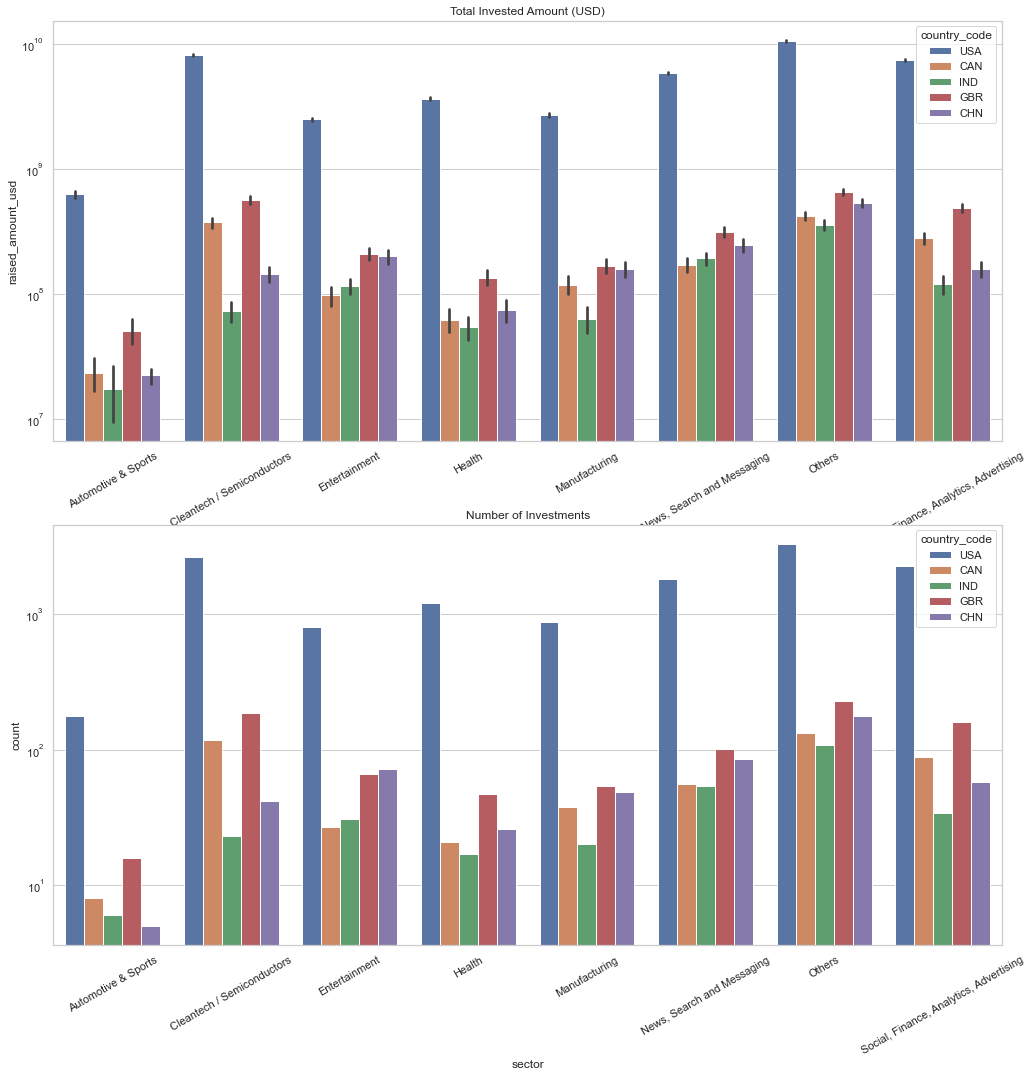

In [ ]:
plt.figure(figsize=(17, 17))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df4, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')
plt.yscale('log')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df4)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')
plt.yscale('log')


plt.show()